In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
df = df.drop(['Loan_ID'], axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [ ]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Used BHAVIK JIKADARA's code to help with preprocessing:
#https://www.kaggle.com/code/bhavikjikadara/loan-status-prediction-decisiontreeclassifier
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)

def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1, 2], inplace=True)

c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']
cat_to_num(df, c_variables)

In [ ]:
df.isnull().corr()["Loan_Status"]

Gender              NaN
Married             NaN
Dependents          NaN
Education           NaN
Self_Employed       NaN
ApplicantIncome     NaN
CoapplicantIncome   NaN
LoanAmount          NaN
Loan_Amount_Term    NaN
Credit_History      NaN
Property_Area       NaN
Loan_Status         NaN
Name: Loan_Status, dtype: float64

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


In [ ]:
df.corr()["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.609630
Property_Area        0.167368
LoanAmount           0.041220
Dependents           0.013701
CoapplicantIncome    0.009016
ApplicantIncome     -0.010167
Self_Employed       -0.017947
Gender              -0.020302
Loan_Amount_Term    -0.049748
Education           -0.055586
Married             -0.092473
Name: Loan_Status, dtype: float64

In [ ]:
df=df.drop(columns=['Dependents', 'CoapplicantIncome', 'ApplicantIncome', 'Self_Employed']) #Removed attributes with correlations within .02 of 0

In [ ]:
df.head()

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,128,360,1,0,0
1,0,0,0,66,360,1,1,1
2,0,0,1,120,360,1,1,1
3,0,1,0,141,360,1,1,1
4,0,0,1,95,360,1,1,1


<Axes: xlabel='Credit_History', ylabel='count'>

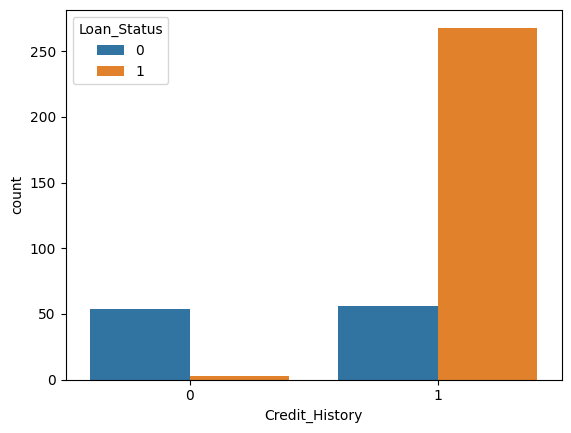

In [ ]:
sns.countplot(x="Credit_History",data=df, hue="Loan_Status") #We see why this is the most highly correlated attribute,
#almost no loans were given to people who did not match the loan criteria and the majority of people with the required
#credit history did receive the loan

<Axes: xlabel='Property_Area', ylabel='count'>

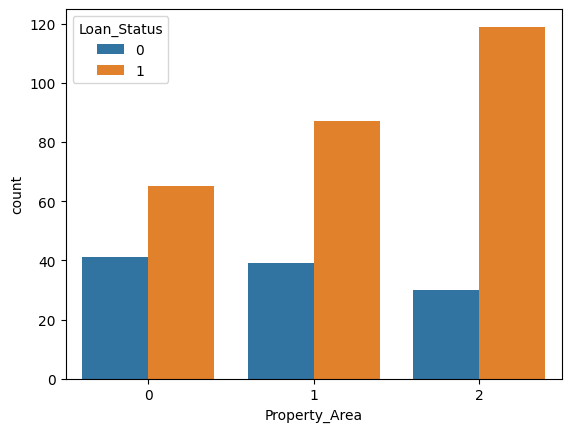

In [ ]:
sns.countplot(x="Property_Area",data=df, hue="Loan_Status") #We can see a slight correlation where the rejections
#of loans are similar for each property area type, but there are the most accepted loans in semiurban neighborhoods,
#and the least accepted loans in rural neighborhoods

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Loan_Status", axis=1).values
y = df["Loan_Status"].values
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train.shape

(266, 7)

In [ ]:
model = Sequential()
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #Binary Classification

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import History

# Create a History callback
history_callback = History()

In [ ]:
#Prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', patience = 10)
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),callbacks=[early_stop, history_callback])

Epoch 1/600
9/9 [==============================] - 2s 40ms/step - loss: 0.7336 - val_loss: 0.7424
Epoch 2/600
9/9 [==============================] - 0s 9ms/step - loss: 0.7078 - val_loss: 0.7225
Epoch 3/600
9/9 [==============================] - 0s 9ms/step - loss: 0.6861 - val_loss: 0.7058
Epoch 4/600
9/9 [==============================] - 0s 10ms/step - loss: 0.6665 - val_loss: 0.6910
Epoch 5/600
9/9 [==============================] - 0s 12ms/step - loss: 0.6469 - val_loss: 0.6774
Epoch 6/600
9/9 [==============================] - 0s 9ms/step - loss: 0.6301 - val_loss: 0.6670
Epoch 7/600
9/9 [==============================] - 0s 8ms/step - loss: 0.6172 - val_loss: 0.6593
Epoch 8/600
9/9 [==============================] - 0s 9ms/step - loss: 0.6064 - val_loss: 0.6515
Epoch 9/600
9/9 [==============================] - 0s 8ms/step - loss: 0.5975 - val_loss: 0.6438
Epoch 10/600
9/9 [==============================] - 0s 9ms/step - loss: 0.5896 - val_loss: 0.6381
Epoch 11/600
9/9 [========

In [ ]:
pred = model.predict(X_test)
pred_classes = (pred > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_classes))
print(confusion_matrix(y_test,pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        37
           1       0.87      1.00      0.93        78

    accuracy                           0.90       115
   macro avg       0.93      0.84      0.87       115
weighted avg       0.91      0.90      0.89       115

[[25 12]
 [ 0 78]]


In [ ]:
history = history_callback.history

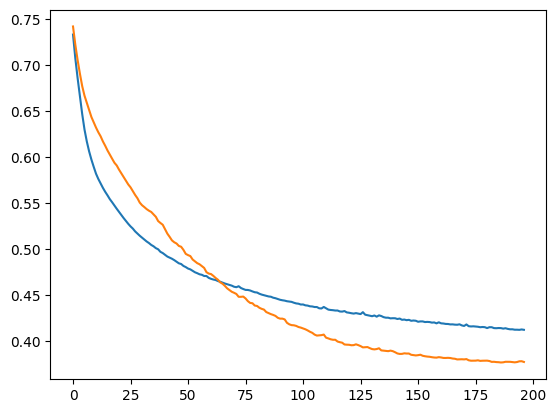

In [ ]:
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')